<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/Ecuador_category_product_exports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
# Librerías para visualizacion
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import re
import networkx as nx
from itertools import count
from itertools import combinations
from itertools import product
import statsmodels.api as sm
import urllib.request, json
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import seaborn as sns
sns.set_style('whitegrid') # grids en dark background

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('librerías cargadas')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
librerías cargadas


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [28]:
## Se importa la base de las categorías de exportaciones desde el drive
df_base = pd.read_csv("/content/drive/MyDrive/eci/base/country_sitcproductsection_year_v2.csv")

print('dataframe cargado')

dataframe cargado


In [29]:
df_base.sample(n=5)

,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category
30727,151,2,2012,40568387.00,119796143.00,0.00,0.31,-0.10,0.22,-1.04,MUS,2,NaN
123616,114,10,2012,137000000000.00,185000000000.00,0.03,1.69,2.33,-0.87,-0.17,JPN,services,NaN
9691,223,0,1997,267508925.00,584834783.00,0.00,0.46,-0.19,-0.22,-0.74,TUN,0,NaN
81688,220,6,1983,85065.00,373628.00,0.00,0.00,0.40,-0.54,0.16,TLS,6,NaN
24432,7,2,1986,58106570.00,58775078.00,0.00,1.79,-0.05,-0.72,-1.03,ARE,2,NaN


In [30]:
df_ec = df_base[(df_base['location_code']=='ECU') ].copy()
df_ec_2010 = df_ec[(df_ec['year']==2010)].copy()
df_ec_2017 = df_ec[(df_ec['year']==2017)].copy()
df_ec_2007 = df_ec[(df_ec['year']==2007)].copy()
df_ec_2014 = df_ec[(df_ec['year']==2014)].copy()
df_ec_2015 = df_ec[(df_ec['year']==2015)].copy()

# df_ec.head()
df_ec_2010.head()
df_ec_2017.head()

,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category
2980,67,0,2010,5670722323.00,1400741720.00,0.01,3.09,-0.73,-0.84,-0.73,ECU,0,Animal Products and Tropical Agriculture
15003,67,1,2010,51327133.00,60601812.00,0.00,0.21,-0.73,-0.84,-0.70,ECU,1,"Alcholic and Non-Alcoholic Beverages, Tobacco, etc."
27026,67,2,2010,731101351.00,346363942.00,0.00,0.53,-0.73,-0.84,-1.04,ECU,2,Forest Products and Raw Materials
39049,67,3,2010,9725049846.00,4133966666.00,0.00,1.78,-0.73,-0.84,-0.85,ECU,3,Petroleum and Derivatives
51072,67,4,2010,203452790.00,144957569.00,0.00,1.21,-0.73,-0.84,-0.95,ECU,4,Animal And Vegetable Oils


,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category
2987,67,0,2017,8126365655.00,1772273567.00,0.01,3.32,-1.11,-1.16,-0.76,ECU,0,Animal Products and Tropical Agriculture
15010,67,1,2017,99895167.00,52420688.00,0.00,0.32,-1.11,-1.16,-0.72,ECU,1,"Alcholic and Non-Alcoholic Beverages, Tobacco, etc."
27033,67,2,2017,1052588224.00,354171805.00,0.00,0.73,-1.11,-1.16,-0.99,ECU,2,Forest Products and Raw Materials
39056,67,3,2017,7170105104.00,3952324223.00,0.00,1.66,-1.11,-1.16,-0.70,ECU,3,Petroleum and Derivatives
51079,67,4,2017,288917510.00,141319595.00,0.00,1.35,-1.11,-1.16,-0.99,ECU,4,Animal And Vegetable Oils


In [31]:
df_ec_2017['percent'] = (df_ec_2017['export_value'] / df_ec_2017['export_value'].sum()) * 100
df_ec_2017.head()

,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category,percent
2987,67,0,2017,8126365655.00,1772273567.00,0.01,3.32,-1.11,-1.16,-0.76,ECU,0,Animal Products and Tropical Agriculture,37.94
15010,67,1,2017,99895167.00,52420688.00,0.00,0.32,-1.11,-1.16,-0.72,ECU,1,"Alcholic and Non-Alcoholic Beverages, Tobacco, etc.",0.47
27033,67,2,2017,1052588224.00,354171805.00,0.00,0.73,-1.11,-1.16,-0.99,ECU,2,Forest Products and Raw Materials,4.91
39056,67,3,2017,7170105104.00,3952324223.00,0.00,1.66,-1.11,-1.16,-0.70,ECU,3,Petroleum and Derivatives,33.47
51079,67,4,2017,288917510.00,141319595.00,0.00,1.35,-1.11,-1.16,-0.99,ECU,4,Animal And Vegetable Oils,1.35


In [32]:
df_ec_2010['percent'] = (df_ec_2010['export_value'] / df_ec_2010['export_value'].sum()) * 100
df_ec_2007['percent'] = (df_ec_2007['export_value'] / df_ec_2007['export_value'].sum()) * 100
df_ec_2014['percent'] = (df_ec_2014['export_value'] / df_ec_2014['export_value'].sum()) * 100
df_ec_2015['percent'] = (df_ec_2015['export_value'] / df_ec_2015['export_value'].sum()) * 100


# df_ec_2010.head(5)
# df_ec_2007.head(5)
df_ec_2014.head(5)
df_ec_2015.head(5)

,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category,percent
2984,67,0,2014,8528188647.00,1864670224.00,0.01,3.45,-1.05,-1.11,-0.75,ECU,0,Animal Products and Tropical Agriculture,28.67
15007,67,1,2014,90842123.00,39414038.00,0.00,0.29,-1.05,-1.11,-0.69,ECU,1,"Alcholic and Non-Alcoholic Beverages, Tobacco, etc.",0.31
27030,67,2,2014,1074890043.00,423014301.00,0.00,0.68,-1.05,-1.11,-1.00,ECU,2,Forest Products and Raw Materials,3.61
39053,67,3,2014,14541287478.00,6067208538.00,0.00,1.99,-1.05,-1.11,-0.85,ECU,3,Petroleum and Derivatives,48.88
51076,67,4,2014,279409843.00,144717845.00,0.00,1.31,-1.05,-1.11,-0.93,ECU,4,Animal And Vegetable Oils,0.94


,location_id,product_id,year,export_value,import_value,global_market_share,export_rpop,sitc_eci,sitc_coi,pci,location_code,sitc_product_code,leamer_category,percent
2985,67,0,2015,7737702596.00,1597886337.00,0.01,3.46,-1.03,-1.06,-0.69,ECU,0,Animal Products and Tropical Agriculture,37.03
15008,67,1,2015,94225357.00,28963803.00,0.00,0.32,-1.03,-1.06,-0.74,ECU,1,"Alcholic and Non-Alcoholic Beverages, Tobacco, etc.",0.45
27031,67,2,2015,1033309569.00,295791079.00,0.00,0.82,-1.03,-1.06,-0.92,ECU,2,Forest Products and Raw Materials,4.95
39054,67,3,2015,6965846226.00,3828773106.00,0.00,1.61,-1.03,-1.06,-0.88,ECU,3,Petroleum and Derivatives,33.34
51077,67,4,2015,304747161.00,120453537.00,0.00,1.63,-1.03,-1.06,-0.96,ECU,4,Animal And Vegetable Oils,1.46


<Figure size 720x576 with 0 Axes>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

([<matplotlib.axis.XTick at 0x7f9935285220>,
 [Text(0, 0, 'Animal Products and Tropical Agriculture'),
  Text(0, 0, 'Alcholic and Non-Alcoholic Beverages, Tobacco, etc.'),
  Text(0, 0, 'Forest Products and Raw Materials'),
  Text(0, 0, 'Petroleum and Derivatives'),
  Text(0, 0, 'Animal And Vegetable Oils'),
  Text(0, 0, 'Chemical'),
  Text(0, 0, 'Capital Intensive'),
  Text(0, 0, 'Machinary'),
  Text(0, 0, 'Labor intensive'),
  Text(0, 0, 'Commidities Not Classif'),
  Text(0, 0, 'Services')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

Text(0.5, 1.0, 'Criterio: Exportaciones en porcentajes según clasificación de productos SICT')

Text(0.126, 0.96, 'Figura 1: Exportaciones del Ecuador por grupo de productos (Porcentajes)')

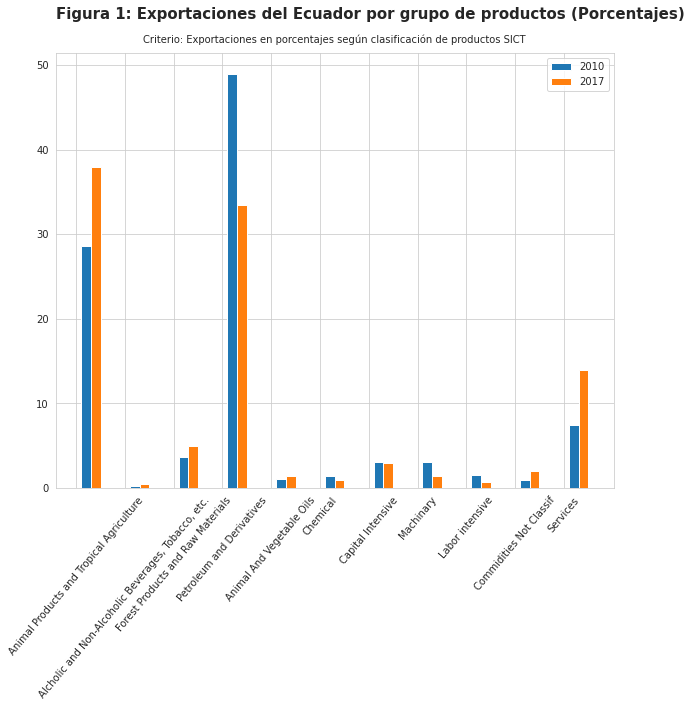

In [42]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

category = df_ec_2015['leamer_category']
base_2010 = df_ec_2010['percent']
base_2017 = df_ec_2017['percent']
# Php = [ 5, 9, 12]

x_axis = np.arange(len(category))

# Multi bar Chart
plt.figure(figsize=(10,8))

plt.bar(x_axis +0.20, base_2010, width=0.2, label = '2010')
plt.bar(x_axis +0.20*2, base_2017, width=0.2, label = '2017')
# plt.bar(x_axis +0.20*3, Php, width=0.2, label = 'Php')

# Xticks

plt.xticks(x_axis,category)
plt.xticks(rotation = 50) # Rotates X-Axis Ticks by 45-degrees

# plt.set_ylabel("Exportaciones de Productos"+'\n'+ " (USD 1000 millones USD)")
# plt.set_xlabel("Productos" +'\n'+ "(Top 10)")

plt.title('Criterio: Exportaciones en porcentajes según clasificación de productos SICT',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 1: Exportaciones del Ecuador por grupo de productos (Porcentajes)",
    fontsize=15,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# Add legend

plt.legend()

# Display

plt.show()

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

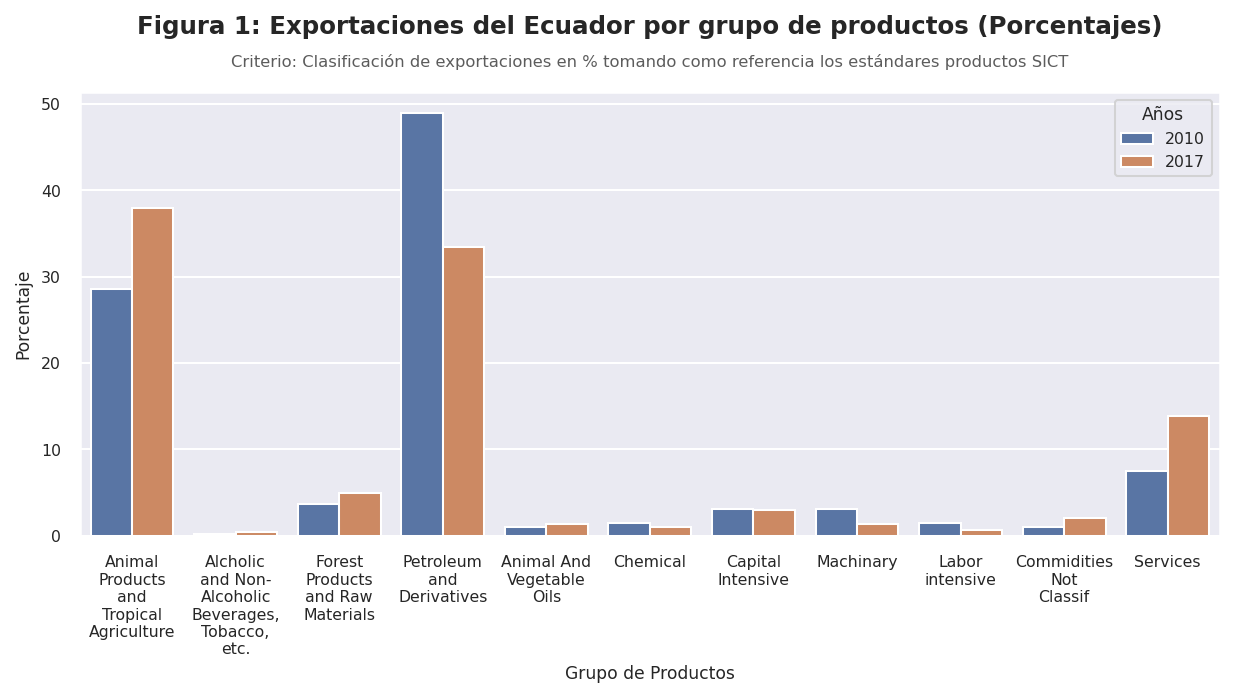

In [72]:
vertical_concat = pd.concat([df_ec_2010, df_ec_2017], axis=0)


sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)
fig, ax = plt.subplots(figsize=(10, 4))
# top10 = airbnb['neighborhood'].value_counts().index[:10]
# ax.set_title('Figura 1: Exportaciones del Ecuador por grupo de productos (Porcentajes)')
# ax.set_('Monthly Avg Temperatures')




sns.barplot(x='leamer_category', y='percent', data=vertical_concat, ax=ax 
            , ci=None, 
            hue='year', hue_order=[2010, 2017])
wrap_labels(ax, 10)

ax.text(x=0.5, y=1.12, s='Figura 1: Exportaciones del Ecuador por grupo de productos (Porcentajes)', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Criterio: Clasificación de exportaciones en % tomando como referencia los estándares productos SICT', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


ax.set_xlabel('Grupo de Productos')
ax.set_ylabel('Porcentaje')

ax.legend(bbox_to_anchor=(1, 1), title='Años');

# ax.figure